In [ ]:
pip install spotipy

In [104]:
# Imports
import pandas as pd
import spotipy
import requests
from spotipy.oauth2 import SpotifyClientCredentials

# Credentials to access data
# This requires that you make a spotify developer account (free) https://developer.spotify.com/
# Replace the credentials and redirect url with one you make in the developer dashboard settings
spotify_details = {
    'client_id' : 'client id',
    'client_secret':'client secret',
    'redirect_uri':'http://hapi.com/callback/'}

sp = spotipy.Spotify(
        auth_manager=spotipy.SpotifyOAuth(
          client_id=spotify_details['client_id'],
          client_secret=spotify_details['client_secret'],
          redirect_uri=spotify_details['redirect_uri'],    
          open_browser=False))

# The output should give you a redirect link that leads to spotify error page.
# Copy the url from the error page and paste in the box

In [ ]:
# Funcitons utilizing spotipy 
# Populate list with track IDs
def getTrackIDs(user, playlist_id):
  track_ids = []
  playlist = sp.user_playlist(user, playlist_id)
  for item in playlist['tracks']['items']:
    track = item['track']
    track_ids.append(track['id'])
  return track_ids

# Pass in track ID to get info and audio features
def getTrackFeatures(id):
  track_info = sp.track(id)
  features_info = sp.audio_features(id)

  # Track info
  name = track_info['name']
  album = track_info['album']['name']
  artist = track_info['album']['artists'][0]['name']
  release_date = track_info['album']['release_date']
  length = track_info['duration_ms']
  popularity = track_info['popularity']

  # Track features
  acousticness = features_info[0]['acousticness']
  danceability = features_info[0]['danceability']
  energy = features_info[0]['energy']
  instrumentalness = features_info[0]['instrumentalness']
  liveness = features_info[0]['liveness']
  loudness = features_info[0]['loudness']
  speechiness = features_info[0]['speechiness']
  tempo = features_info[0]['tempo']
  time_signature = features_info[0]['time_signature']

  track_data = [name, album, artist, release_date, length, popularity, acousticness, danceability, energy, instrumentalness, liveness, loudness, speechiness, tempo, time_signature]
  return track_data

In [105]:
# Empty lists for first dataframe that contains the ID, song, artist, and popularity
artist_name = []
track_name = []
popularity = []
ids = []

for i in range(0,800,50):
    track_results = sp.search(q='genre:hip-hop', type='track', limit=50, offset=i)  # Spotipy search for hip-hop songs
    for i, t in enumerate(track_results['tracks']['items']):  # Iterate and append basic info to lists
        artist_name.append(t['artists'][0]['name'])
        track_name.append(t['name'])
        ids.append(t['id'])
        popularity.append(t['popularity'])

basic_df = pd.DataFrame({'artist_name':artist_name,'track_name':track_name,'track_id':ids,'popularity':popularity})
basic_df.head()

,artist_name,track_name,track_id,popularity
0,Drake,Rich Flex,1bDbXMyjaUIooNwFE9wn0N,96
1,JAY-Z,Ni**as In Paris,4Li2WHPkuyCdtmokzW2007,84
2,Childish Gambino,Redbone,0WtDGnWL2KrMCk0mI1Gpwz,83
3,Oliver Tree,Miss You,73vIOb4Q7YN6HeJTbscRx5,94
4,Kendrick Lamar,LOVE. FEAT. ZACARI.,6PGoSes0D9eUDeeAafB2As,83


In [106]:
# List for the dataframe with audio features
# This takes roughly 2 minutes to run
track_list = []
for i in range(len(ids)):
  full_data = getTrackFeatures(ids[i])
  track_list.append(full_data)

full_df = pd.DataFrame(track_list, columns = ['Name', 'Album', 'Artist', 'Release_date', 'Length', 'Popularity', 'Acousticness', 'Danceability', 'Energy', 'Instrumentalness', 'Liveness', 'Loudness', 'Speechiness', 'Tempo', 'Time_signature'])
full_df.head()

,Name,Album,Artist,Release_date,Length,Popularity,Acousticness,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Time_signature
0,Rich Flex,Her Loss,Drake,2022-11-04,239359,96,0.0503,0.561,0.520,0.000002,0.355,-9.342,0.2440,153.150,3
1,Ni**as In Paris,Watch The Throne (Deluxe),JAY-Z,2011-08-08,219333,84,0.1270,0.789,0.858,0.000000,0.349,-5.542,0.3110,140.022,4
2,Redbone,"""Awaken, My Love!""",Childish Gambino,2016-12-02,326933,83,0.1740,0.745,0.353,0.006620,0.118,-10.614,0.0983,160.111,4
3,Miss You,Miss You,Oliver Tree,2022-08-05,206000,94,0.0128,0.587,0.742,0.001070,0.146,-6.640,0.0529,145.007,4
4,LOVE. FEAT. ZACARI.,DAMN.,Kendrick Lamar,2017-04-14,213400,83,0.2640,0.800,0.585,0.000000,0.153,-7.343,0.0924,126.058,4


In [ ]:
pip install scikit-learn

In [107]:
# Imports for modeling
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import precision_recall_fscore_support as score
import random
import statsmodels.api as sm

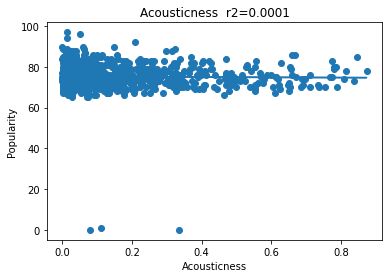

In [108]:
# Scatterplots for correlation to Popularity

#Acousticness
X1 = full_df['Acousticness']
y = full_df['Popularity']

plt.scatter(X1, y)
m, b = np.polyfit(X1, y, 1)
plt.plot(X1, m*X1+b)

corr_matrix = np.corrcoef(X1, y)
corr = corr_matrix[0,1]
R_sq = corr**2
r2 = round(R_sq, 4)

plt.xlabel("Acousticness")
plt.ylabel("Popularity")
plt.title("Acousticness  r2=" + str(r2))

plt.show()



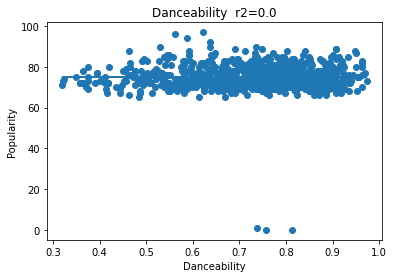

In [109]:
# Scatterplots for correlation to Popularity

#Danceability
X2 = full_df['Danceability']
y = full_df['Popularity']

plt.scatter(X2, y)
m, b = np.polyfit(X2, y, 1)
plt.plot(X2, m*X2+b)

corr_matrix = np.corrcoef(X2, y)
corr = corr_matrix[0,1]
R_sq = corr**2
r2 = round(R_sq, 4)

plt.xlabel("Danceability")
plt.ylabel("Popularity")
plt.title("Danceability  r2=" + str(r2))

plt.show()

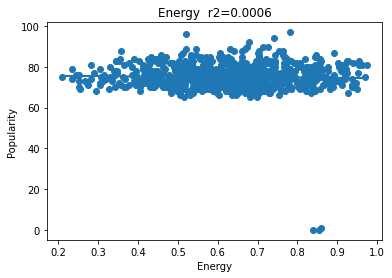

In [110]:
# Scatterplots for correlation to Popularity

#Energy
X3 = full_df['Energy']
y = full_df['Popularity']

plt.scatter(X3, y)
m, b = np.polyfit(X3, y, 1)
plt.plot(X3, m*X3+b)

corr_matrix = np.corrcoef(X3, y)
corr = corr_matrix[0,1]
R_sq = corr**2
r2 = round(R_sq, 4)

plt.xlabel("Energy")
plt.ylabel("Popularity")
plt.title("Energy  r2=" + str(r2))

plt.show()

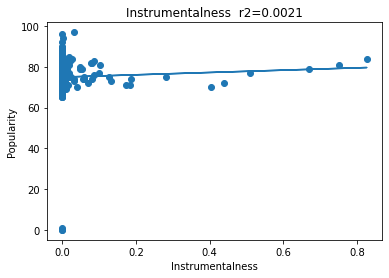

In [111]:
# Scatterplots for correlation to Popularity

#Instrumentalness
X4 = full_df['Instrumentalness']
y = full_df['Popularity']

plt.scatter(X4, y)
m, b = np.polyfit(X4, y, 1)
plt.plot(X4, m*X4+b)

corr_matrix = np.corrcoef(X4, y)
corr = corr_matrix[0,1]
R_sq = corr**2
r2 = round(R_sq, 4)

plt.xlabel("Instrumentalness")
plt.ylabel("Popularity")
plt.title("Instrumentalness  r2=" + str(r2))

plt.show()

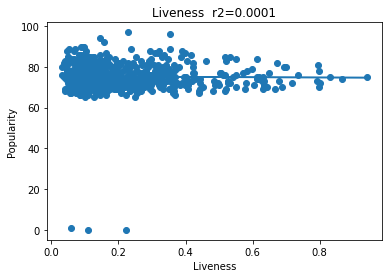

In [112]:
# Scatterplots for correlation to Popularity

#Liveness
X5 = full_df['Liveness']
y = full_df['Popularity']

plt.scatter(X5, y)
m, b = np.polyfit(X5, y, 1)
plt.plot(X5, m*X5+b)

corr_matrix = np.corrcoef(X5, y)
corr = corr_matrix[0,1]
R_sq = corr**2
r2 = round(R_sq, 4)

plt.xlabel("Liveness")
plt.ylabel("Popularity")
plt.title("Liveness  r2=" + str(r2))

plt.show()

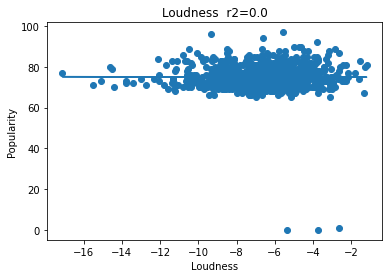

In [113]:
# Scatterplots for correlation to Popularity

#Loudness
X6 = full_df['Loudness']
y = full_df['Popularity']

plt.scatter(X6, y)
m, b = np.polyfit(X6, y, 1)
plt.plot(X6, m*X6+b)

corr_matrix = np.corrcoef(X6, y)
corr = corr_matrix[0,1]
R_sq = corr**2
r2 = round(R_sq, 4)

plt.xlabel("Loudness")
plt.ylabel("Popularity")
plt.title("Loudness  r2=" + str(r2))

plt.show()

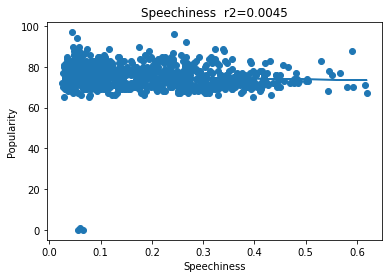

In [114]:
# Scatterplots for correlation to Popularity

#Speechiness
X7 = full_df['Speechiness']
y = full_df['Popularity']

plt.scatter(X7, y)
m, b = np.polyfit(X7, y, 1)
plt.plot(X7, m*X7+b)

corr_matrix = np.corrcoef(X7, y)
corr = corr_matrix[0,1]
R_sq = corr**2
r2 = round(R_sq, 4)

plt.xlabel("Speechiness")
plt.ylabel("Popularity")
plt.title("Speechiness  r2=" + str(r2))

plt.show()

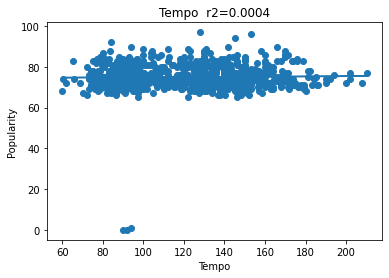

In [115]:
# Scatterplots for correlation to Popularity

#Tempo
X8 = full_df['Tempo']
y = full_df['Popularity']

plt.scatter(X8, y)
m, b = np.polyfit(X8, y, 1)
plt.plot(X8, m*X8+b)

corr_matrix = np.corrcoef(X8, y)
corr = corr_matrix[0,1]
R_sq = corr**2
r2 = round(R_sq, 4)

plt.xlabel("Tempo")
plt.ylabel("Popularity")
plt.title("Tempo  r2=" + str(r2))

plt.show()

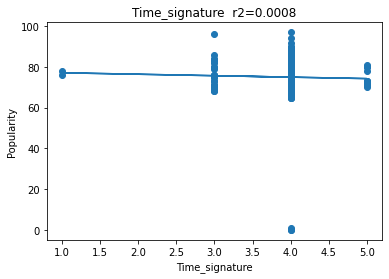

In [116]:
# Scatterplots for correlation to Popularity

#Time Signature
X9 = full_df['Time_signature']
y = full_df['Popularity']

plt.scatter(X9, y)
m, b = np.polyfit(X9, y, 1)
plt.plot(X9, m*X9+b)

corr_matrix = np.corrcoef(X9, y)
corr = corr_matrix[0,1]
R_sq = corr**2
r2 = round(R_sq, 4)

plt.xlabel("Time_signature")
plt.ylabel("Popularity")
plt.title("Time_signature  r2=" + str(r2))

plt.show()

In [128]:
# Convert data to proper data type for model analysis

for label in full_df.columns:
    if label != 'Name' and label != 'Album' and label != 'Artist' and label != 'Release_date':
        full_df[label] = pd.to_numeric(full_df[label])
    #if label != 'Release_date':
    #    full_df[label] = pd.to_datetime(full_df[label])



# Check that datatypes are ok
#full_df.info()



# Define test and train data sets

X = full_df[['Acousticness', 'Danceability', 'Energy', 'Instrumentalness', 'Liveness', 'Loudness', 'Speechiness', 'Tempo', 'Time_signature']]
y = full_df['Popularity']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2)


# Linear Regression Model

linreg = LinearRegression()
linreg.fit(X_train, y_train)
linreg.predict(X_test)
linreg.score(X_test, y_test)

y_pred = linreg.predict(X_test)
R_square = r2_score(y_test, y_pred) 

print("Linear Regression MAE: " + str(mean_absolute_error(y_test, y_pred)))
print("Linear Regression MSE: " + str(mean_squared_error(y_test, y_pred)))
print("Linear Regression RMSE: " + str(np.sqrt(mean_squared_error(y_test, y_pred))))
print("Linear Regression R Square: " + str(R_square))

# Ordinary Least Squares Model

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

rms = np.sqrt(mean_squared_error(y_test, y_pred))
R_square = r2_score(y_test, y_pred) 

print("Ordinary Least Squares MAE: " + str(mean_absolute_error(y_test, y_pred)))
print("Ordinary Least Squares MSE: " + str(mean_squared_error(y_test, y_pred)))
print("Ordinary Least Squares RMSE: " + str(rms))
print("Ordinary Least Squares R Square: " + str(R_square))

#print("OLS Model Summary: ") 
#print(model.summary())



# Logistic Regression Model

logreg= LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

rms = np.sqrt(mean_squared_error(y_test, y_pred))
R_square = r2_score(y_test, y_pred) 

print("Logistic Regression MAE: " + str(mean_absolute_error(y_test, y_pred)))
print("Logistic Regression MSE: " + str(mean_squared_error(y_test, y_pred)))
print("Logistic Regression RMSE: " + str(rms))
print("Logistic Regression R Square: " + str(R_square))



# Support Vector Machine Model

regr = svm.SVR()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

rms = np.sqrt(mean_squared_error(y_test, y_pred))
R_square = r2_score(y_test, y_pred) 

print("Support Vector Machine MAE: " + str(mean_absolute_error(y_test, y_pred)))
print("Support Vector Machine MSE: " + str(mean_squared_error(y_test, y_pred)))
print("Support Vector Machine RMSE: " + str(rms))
print("Support Vector Machine R Square: " + str(R_square))



# Multi-layer Perceptron Regressor Model 
    #(use 'adam' due to large dataset)

MLPreg = MLPRegressor(solver='adam', alpha=1e-5,hidden_layer_sizes=(100,), random_state=1)
MLPreg.fit(X_train, y_train)
y_pred = MLPreg.predict(X_test)

rms = np.sqrt(mean_squared_error(y_test, y_pred))
R_square = r2_score(y_test, y_pred) 

print("Multi-layer Perceptron Regressor MAE: " + str(mean_absolute_error(y_test, y_pred)))
print("Multi-layer Perceptron Regressor MSE: " + str(mean_squared_error(y_test, y_pred)))
print("Multi-layer Perceptron Regressor RMSE: " + str(rms))
print("Multi-layer Perceptron Regressor R Square: " + str(R_square))



# Gradient Boosting Regressor Model

GBR = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0,loss='squared_error').fit(X_train, y_train)
y_pred = GBR.predict(X_test)

rms = np.sqrt(mean_squared_error(y_test, y_pred))
R_square = r2_score(y_test, y_pred) 

print("Gradient Boosting Regressor MAE: " + str(mean_absolute_error(y_test, y_pred)))
print("Gradient Boosting Regressor MSE: " + str(mean_squared_error(y_test, y_pred)))
print("Gradient Boosting Regressor RMSE: " + str(rms))
print("Gradient Boosting Regressor R Square: " + str(R_square))





#--------------------------------------------------------------------------------------------


# add popularity to heatmap
#--------- visualize scatterplots of audio features vs popularity (add line of best fit r squared)
# add features function max recommended
# --------------compare scores from each method
# ----------------pick a method and use on test dataset
# ---------------print scores

Linear Regression MAE: 3.9566390261211213
Linear Regression MSE: 24.182085145335208
Linear Regression RMSE: 4.917528357349371
Linear Regression R Square: 0.000611229948693448
Ordinary Least Squares MAE: 3.9566390261211213
Ordinary Least Squares MSE: 24.182085145335208
Ordinary Least Squares RMSE: 4.917528357349371
Ordinary Least Squares R Square: 0.000611229948693448
Logistic Regression MAE: 4.14375
Logistic Regression MSE: 28.05625
Logistic Regression RMSE: 5.296815080782035
Logistic Regression R Square: -0.1594989022342761
Support Vector Machine MAE: 3.912053701108232
Support Vector Machine MSE: 25.052575470426547
Support Vector Machine RMSE: 5.0052547857653105
Support Vector Machine R Square: -0.03536409021522591


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Multi-layer Perceptron Regressor MAE: 8.997352541556968
Multi-layer Perceptron Regressor MSE: 116.39990978918418
Multi-layer Perceptron Regressor RMSE: 10.788878986678096
Multi-layer Perceptron Regressor R Square: -3.810534822748151
Gradient Boosting Regressor MAE: 4.372687483089602
Gradient Boosting Regressor MSE: 31.122153973012438
Gradient Boosting Regressor RMSE: 5.578723328236706
Gradient Boosting Regressor R Square: -0.2862055109600905


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


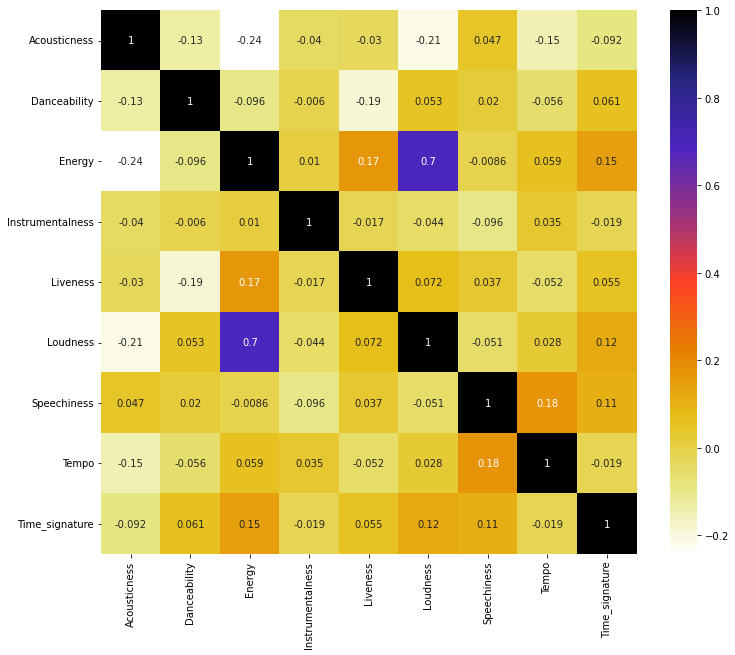

None


NameError: ignored

In [118]:
# Feature Selection
    # so close! just run out of time to perfect the code / resolve error

import seaborn as sns
%matplotlib inline

#y = data['Popularity']
#X = data.drop(['Popularity'], axis = 1)

#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=100 test_size=0.3)    


# Pearson Correlation
cor = X_train.corr()
plt.figure(figsize=(12,10))
sns.heatmap(cor, cmap=plt.cm.CMRmap_r,annot=True)
print(plt.show())


# Find correlated features
def correlation(dataset, threshold):
    col_corr = set()  
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: colname = corr_matrix.columns[i]                  
col_corr.add(colname)
return col_corr   


corr_features = correlation(X_train, 0.7)
Corr_features

X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)
X_train 


# Calculating Fscore and p value
f_p_values=chi2(X_train,y_train)
F_p_values

p_values=pd.Series(f_p_values[1])
p_values.index=X_train.columns
P_values        
p_values.sort_index(ascending=False)

mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))


# Select the top 5 most important audio features
sel_five_cols = SelectKBest(mutual_info_classif, k=5)
sel_five_cols.fit(X_train, y_train)
X_train.columns[sel_five_cols.get_support()]






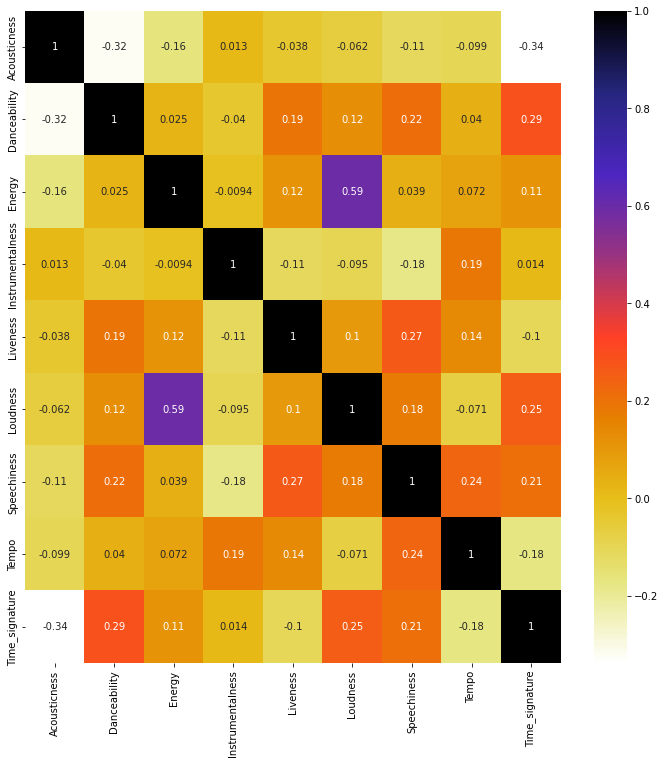

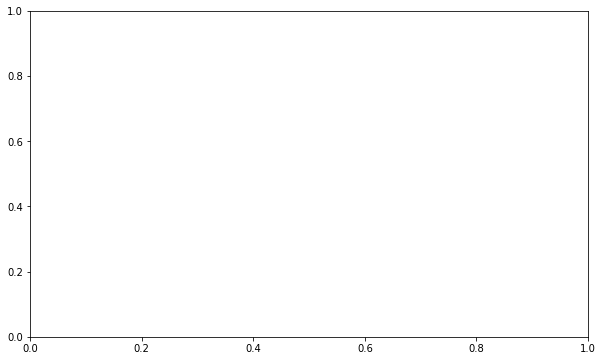

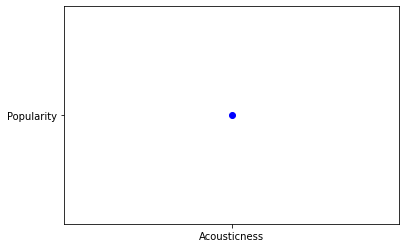

NameError: ignored

In [ ]:
# ---NOTES---


#visualize correlations of audio features

import seaborn as sns

y = full_df['Popularity']
 #Load X Variables into a Pandas Dataframe with columns 
X = full_df.drop(['Popularity'], axis = 1)

# Using Pearson Correlation
cor = X_train.corr()
plt.figure(figsize=(12,12))
sns.heatmap(cor, cmap=plt.cm.CMRmap_r,annot=True)
plt.show()  








features_group = ['Acousticness', 'Danceability', 'Energy', 'Instrumentalness', 'Liveness', 'Loudness', 'Speechiness', 'Tempo', 'Time_signature']
features_group1 = ['Acousticness']

x = features_group1
y = 'Popularity'

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter=(x,y)
plt.show()

plt.scatter(x, y, c ="blue")
plt.show()

subplots[s](rows, cols,_)
fig, axs = plt.subplots(3, 3)


plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(),annot = True)






